<a href="https://colab.research.google.com/github/saraswathykrk/ml_work/blob/main/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
date()

[1] "Sun Oct 10 04:02:41 2021"

In [4]:
install.packages("ChannelAttribution")
library(ChannelAttribution)
install.packages("reshape2")
library(reshape2)
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


ChannelAttribution 2.0.4

Looking for attribution at path level? Try ChannelAttributionPro! Visit www.channelattribution.net for more information.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(PathData)
Data

path,total_conversions,total_conversion_value,total_null
<chr>,<int>,<dbl>,<dbl>
eta > iota > alpha > eta,1,0.24400,3
iota > iota > iota > iota,2,3.19500,6
alpha > iota > alpha > alpha > alpha > iota > alpha > alpha > alpha > alpha > alpha,2,6.75400,6
beta > eta,1,2.40200,3
iota > eta > theta > lambda > lambda > theta > lambda,0,0.00000,2
alpha > eta > alpha > alpha > eta > iota > iota > iota > alpha > alpha > alpha > alpha > alpha > alpha > theta > alpha > alpha > alpha > alpha > alpha > alpha,1,5.04400,3
iota > beta > eta > beta > eta,0,0.00000,2
beta > iota > kappa,1,6.82000,2
eta,1,3.30000,3


In [ ]:
H <- heuristic_models(Data,"path","total_conversions",var_value="total_conversion_value")
H

channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eta,3164,11909.4762,4167,16754.2038,3539.951157,13783.497051
iota,4606,19597.2613,3355,13487.9743,3857.096221,15988.988995
alpha,6308,19121.2724,8447,28414.2143,7574.718594,24524.709569
beta,2831,12235.5917,989,3850.0210,2083.500145,8954.266717
theta,1606,6652.3493,653,2799.0920,1022.801394,4295.743619
lambda,902,3735.6022,1207,5249.9500,1035.257572,4430.316169
kappa,74,305.7432,230,1069.3843,137.964078,599.747786
zeta,27,103.0040,107,453.2608,136.551540,539.528763
epsilon,99,412.3012,531,2202.6123,272.170438,1106.270065


In [ ]:
#ESTIMATE MARKOV MODEL
M <- markov_model(Data, "path", "total_conversions", var_value="total_conversion_value")
M


Number of simulations: 100000 - Convergence reached: 1.46% < 5.00%

Percentage of simulated paths that successfully end before maximum number of steps (46) is reached: 99.99%



channel_name,total_conversion,total_conversion_value
<chr>,<dbl>,<dbl>
eta,3338.742007,13075.978618
iota,3909.928296,15083.427026
alpha,5272.775061,18692.925492
beta,2579.641010,9899.224350
theta,1955.429283,7488.869622
lambda,1266.098599,5036.341682
kappa,261.406103,1053.898622
zeta,415.831061,1552.006879
epsilon,612.118206,2296.704732


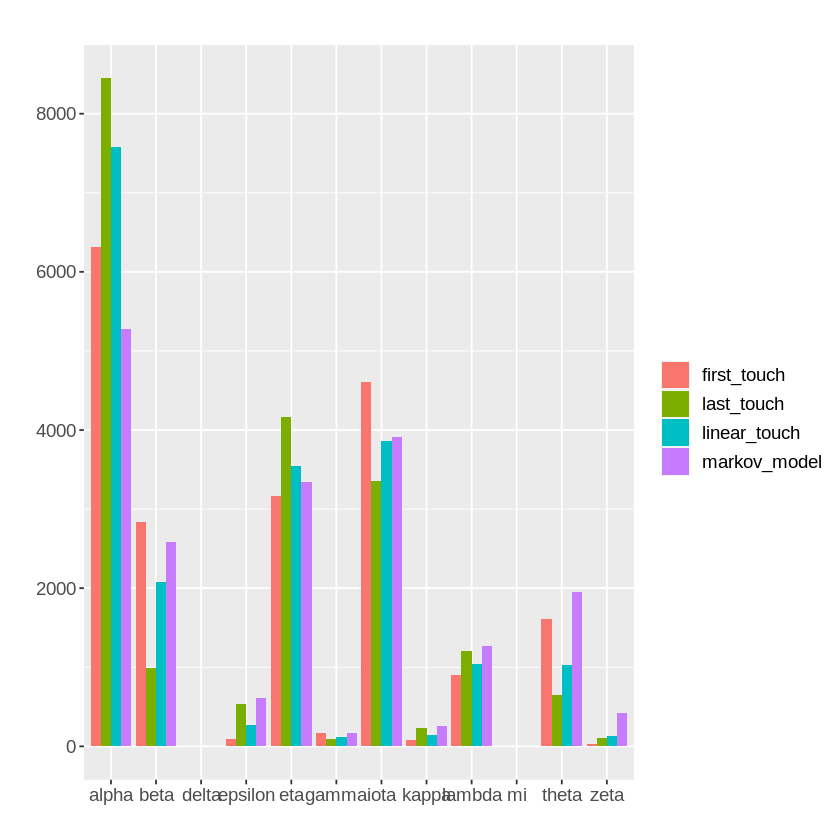

In [ ]:
#PLOT TOTAL CONVERSIONS

R=merge(H,M,by="channel_name")
R1=R[,(colnames(R)%in% c("channel_name","first_touch_conversions","last_touch_conversions",
"linear_touch_conversions","total_conversion"))]
colnames(R1)=c("channel_name","first_touch","last_touch","linear_touch","markov_model")
R2=melt(R1,id="channel_name")
ggplot(R2, aes(channel_name, value, fill = variable)) +
  ggtitle("")+
  geom_bar(stat="identity", position = "dodge") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(text = element_text(size=14)) +
  theme(plot.title=element_text(size=18)) +
  theme(legend.title = element_blank()) +
  ylab("") +
  xlab("")




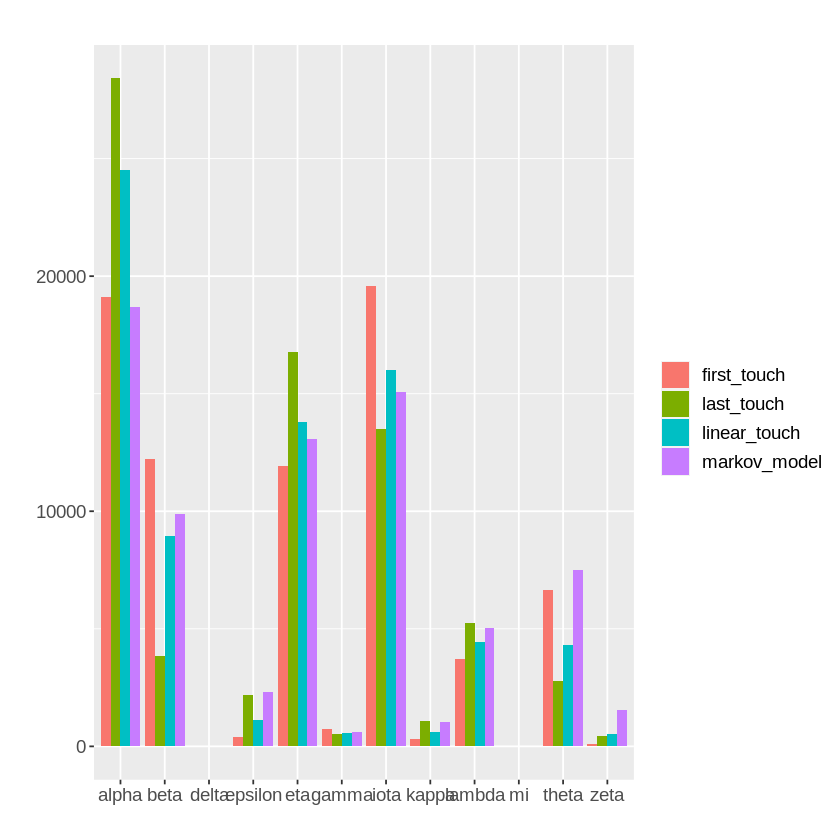

In [ ]:

#PLOT REVENUES
R2=R[,(colnames(R)%in%c("channel_name","first_touch_value","last_touch_value","linear_touch_value",
"total_conversion_value"))]

colnames(R2)=c("channel_name","first_touch","last_touch","linear_touch","markov_model")
R2=melt(R2,id="channel_name")
ggplot(R2, aes(channel_name, value, fill = variable)) +
  ggtitle("")+
  geom_bar(stat="identity", position = "dodge") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(text = element_text(size=14)) +
  theme(plot.title=element_text(size=18)) +
  theme(legend.title = element_blank()) +
  ylab("") +
  xlab("")

In [1]:
Data <- read.csv("/content/example.csv", header = TRUE)

In [2]:
Data

path,total_conversions,total_conversion_value
<chr>,<int>,<int>
Organic Search > Direct,248,99200
Direct > Direct,205,82000
Paid Search > Direct,158,63200
Direct > Direct > Direct,78,31200
Organic Search > Direct > Direct,72,28800
Direct > Referral,62,24800
Organic Search > Referral,62,24800
Organic Search > Paid Search,59,23600
Paid Search > Organic Search,57,22800


In [8]:
#ESTIMATE HEURISTIC MODELS
H <- heuristic_models(Data,"path","total_conversions",var_value="total_conversion_value")
H

channel_name,first_touch_conversions,first_touch_value,last_touch_conversions,last_touch_value,linear_touch_conversions,linear_touch_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Organic Search,493,197200,114,45600,286.2500,114500.00
Direct,507,202800,1015,406000,783.6667,313466.67
Paid Search,434,173600,162,64800,288.2500,115300.00
Referral,36,14400,179,71600,111.8333,44733.33


In [9]:
#ESTIMATE MARKOV MODEL
M <- markov_model(Data, "path", "total_conversions", var_value="total_conversion_value")
M



Number of simulations: 100000 - Convergence reached: 1.76% < 5.00%

Percentage of simulated paths that successfully end before maximum number of steps (4) is reached: 99.18%



channel_name,total_conversion,total_conversion_value
<chr>,<dbl>,<dbl>
Organic Search,341.6951,136678.06
Direct,679.0510,271620.40
Paid Search,311.8741,124749.65
Referral,137.3797,54951.89


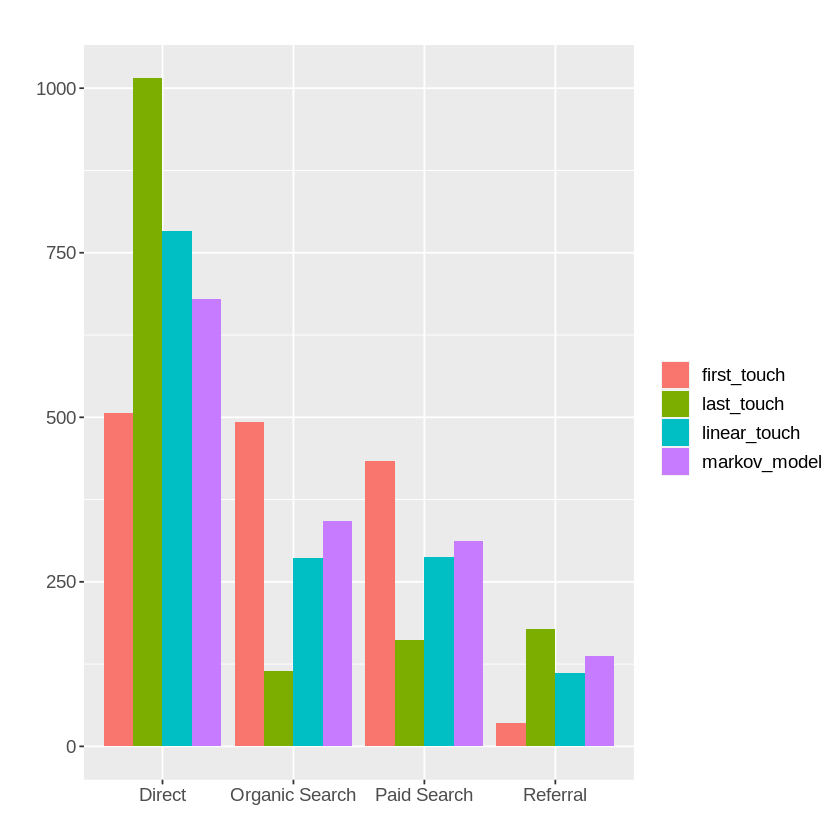

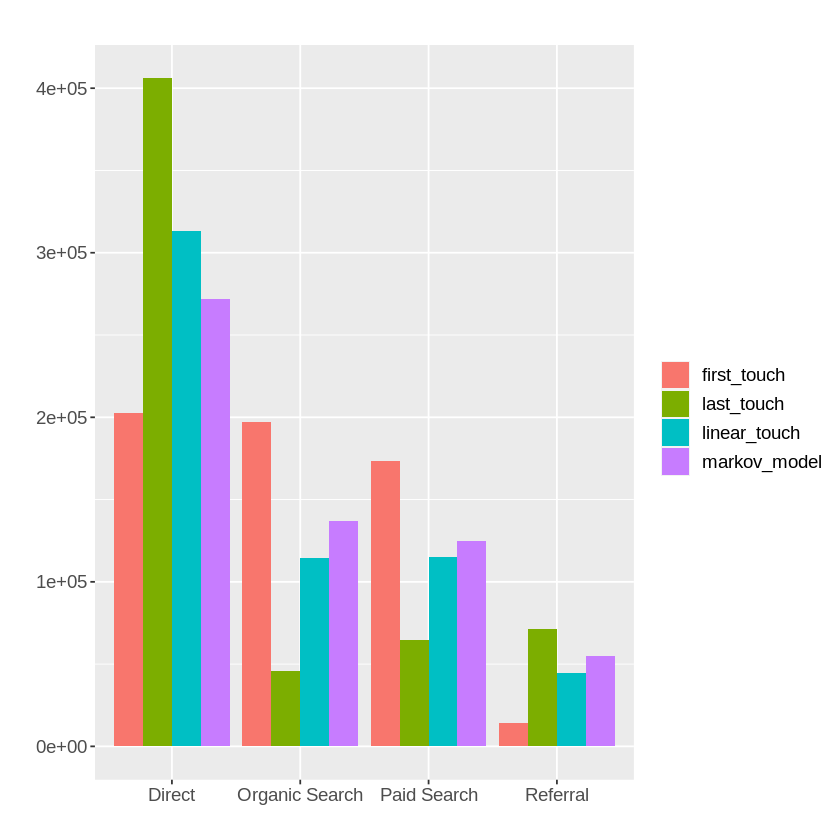

In [10]:


#PLOT TOTAL CONVERSIONS

R=merge(H,M,by="channel_name")
R1=R[,(colnames(R)%in% c("channel_name","first_touch_conversions","last_touch_conversions",
                         "linear_touch_conversions","total_conversion"))]
colnames(R1)=c("channel_name","first_touch","last_touch","linear_touch","markov_model")
R2=melt(R1,id="channel_name")
ggplot(R2, aes(channel_name, value, fill = variable)) +
  ggtitle("")+
  geom_bar(stat="identity", position = "dodge") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(text = element_text(size=14)) +
  theme(plot.title=element_text(size=18)) +
  theme(legend.title = element_blank()) +
  ylab("") +
  xlab("")


#PLOT REVENUES
R2=R[,(colnames(R)%in%c("channel_name","first_touch_value","last_touch_value","linear_touch_value",
                        "total_conversion_value"))]

colnames(R2)=c("channel_name","first_touch","last_touch","linear_touch","markov_model")
R2=melt(R2,id="channel_name")
ggplot(R2, aes(channel_name, value, fill = variable)) +
  ggtitle("")+
  geom_bar(stat="identity", position = "dodge") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(text = element_text(size=14)) +
  theme(plot.title=element_text(size=18)) +
  theme(legend.title = element_blank()) +
  ylab("") +
  xlab("")


In [11]:
write.csv(H,"H.csv")
write.csv(M,"M.csv")